# Import Library

In [1]:
#import warnings
#warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
from os import path
import re
import string

#NLTK
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
#from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

#classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

#N-gram
from nltk.util import ngrams
from nltk import bigrams, trigrams
import nltk
from nltk.util import ngrams

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from sklearn.cross_validation import train_test_split
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, ArrayDictionary, StopWordRemover
#import swifter
#visualization
import matplotlib.pyplot as plt
#% matplotlib inline


In [2]:
import sys
sys.path.append("C:/Users/USER/anaconda3/Lib/site-packages")
#sys.path.append("c:/users/user/anaconda3/lib/site-packages")

# Load Data

In [3]:
df = pd.read_excel('df_tweet_final_mila.xlsx',engine='openpyxl')
df

,Topic,Tweet,Class,Author
0,agama,RAKYAT menunggu KESERIUSAN pernyataan @jokowi ...,y,Bhrigutantra
1,agama,"@Pertama_T @reyhan_irsd baca dong, klo gatau a...",y,kckiranaaa
2,agama,@geloraco Skg tokoh agama lebih memilih jabata...,y,Lani34823852
3,agama,@Pertama_T @reyhan_irsd Inilah pentingnya memb...,y,KCangcut
4,agama,RT @ribonk: Hot take; orang yg dikit2 bawa zod...,y,Far_away90
...,...,...,...,...
20596,tolol,bacot lord yang mulia para anak org kaya yang ...,n,jeckpot1milyar
20597,tolol,@rainotrey @finerubys Wkwkwkkwkwwk adu jadi in...,n,owchakep
20598,tolol,"gw gblk bngt, tolol, ga punya otak wwkw, ngabi...",n,kohyangkasa_
20599,tolol,@23Anggelina @sbyfess Jadi inget. Numpang ceri...,n,husnudzonn


## Persebaran Data

n    10500
y    10101
Name: Class, dtype: int64


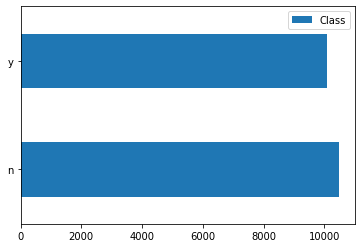

In [4]:
label = df['Class'].value_counts()
print(label)
plot_data = pd.DataFrame(label)
plot_data =plot_data.plot(kind='barh')

## Replace Emoticon

In [5]:
def unicodetoascii(text):
    TEXT = (text.
            replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa6', '...').#
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('&amp;', " ").
            replace('\\xe2\\x81\\xbe', ")").
            replace('\\xe3\\x83\\x88\\xe3\\x83\\xac\\xe3\\x82\\xb8\\xe3\\x83\\xa3\\xe3\\x83\\xbc', " ")
           )
    return TEXT
df['Tweet'] = df['Tweet'].apply(lambda x: unicodetoascii(x))

## Cleaning Data

In [7]:
def remove(tweet):
    # remove b'
    tweet = re.sub(r'b[\s]+', ' ', tweet)
    
    #remove mention
    tweet = re.sub('@[^\s]+', '', tweet)
    #tweet = re.sub(r'\\[^\s]+', '', tweet)
    
    #remove link
    #tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    
    #remove hashtag / tagar
    tweet = re.sub(r'#([^\s]+)', '', tweet)
    
    #remove RT 
    tweet = re.sub(r'RT[\s]+', '', tweet)
    
    # remove Non ASCII char
    tweet = re.sub(r'\\n', ' ', tweet)
    tweet = re.sub(r'[^\x00-\x7f]', r'', tweet)
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', tweet)
    tweet = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", tweet) #
    tweet = re.sub(r'\\u\w\w\w\w', '', tweet)
    
    
    #remove simbol dan karakter aneh
    tweet = re.sub(r'[^A-Za-z]+',' ', tweet)         #punctuation / tanda baca
    #tweet = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", tweet)
    
    #remove single char
    tweet = re.sub(r"\b[a-zA-Z]\b", "", tweet)
    
    #tweet = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", tweet).split())
    tweet = re.sub('[0-9]+', '', tweet)           
    #tweet = re.sub(r'@[\s]+', '',tweet)
    tweet = re.sub('\s+',' ',tweet)                 
    #tweet = tweet.translate(str.maketrans(' ', ' ', string.punctuation))
    return tweet
df['Tweet'] = df['Tweet'].apply(lambda x: remove(x))
df.head()

,Topic,Tweet,Class,Author
0,agama,RAKYAT menunggu KESERIUSAN pernyataan soal pen...,y,Bhrigutantra
1,agama,baca dong klo gatau apa gausah sok bawa agama...,y,kckiranaaa
2,agama,Skg tokoh agama lebih memilih jabatan dan gol...,y,Lani34823852
3,agama,Inilah pentingnya membaca biar gasotoy menjus...,y,KCangcut
4,agama,Hot take orang yg dikit bawa zodiak ke topik a...,y,Far_away90


In [7]:
df['Tweet'][0]

'RAKYAT menunggu KESERIUSAN pernyataan soal penegakan hukum tetapi sampai detik ini laporan utk kasus PENISTAAN AGAMA dan RAS yg dilakukan belum ada kejelasan juga MOSOK sich KALAH sama KERAS '

In [8]:
df['Tweet'] = df['Tweet'].str.lower()
df.head()

,Topic,Tweet,Class,Author
0,agama,rakyat menunggu keseriusan pernyataan soal pen...,y,Bhrigutantra
1,agama,baca dong klo gatau apa gausah sok bawa agama...,y,kckiranaaa
2,agama,skg tokoh agama lebih memilih jabatan dan gol...,y,Lani34823852
3,agama,inilah pentingnya membaca biar gasotoy menjus...,y,KCangcut
4,agama,hot take orang yg dikit bawa zodiak ke topik a...,y,Far_away90


## Normalization

In [9]:
df_normalisasi = pd.read_excel('normalisasi.xlsx',engine='openpyxl')
df_normalisasi_kms = dict(zip(df_normalisasi['before'], df_normalisasi['after']))

def normalize(text):
    return ' '.join([df_normalisasi_kms[word] if word in df_normalisasi_kms else word for word in text.split(' ')])

df['Normalized'] = df['Tweet'].apply(normalize)
df.head(3)

,Topic,Tweet,Class,Author,Normalized
0,agama,rakyat menunggu keseriusan pernyataan soal pen...,y,Bhrigutantra,rakyat menunggu keseriusan pernyataan soal pen...
1,agama,baca dong klo gatau apa gausah sok bawa agama...,y,kckiranaaa,baca dong kalau tak tau apa tidak usah sok ba...
2,agama,skg tokoh agama lebih memilih jabatan dan gol...,y,Lani34823852,sekarang tokoh agama lebih memilih jabatan da...


## Filtering (Stopword)

In [10]:
noise_word = pd.read_excel('noises.xlsx', engine='openpyxl')
noise_word = list(noise_word['noises'])

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'ajskdlfl', 'aing',
                       'âœyang', 'luuu', 'lonya', 'gue', 'gua'])

list_stopwords.extend(noise_word)
list_stopwords = set(list_stopwords)
#def stopwords_removal(words):
#    return [word for word in words if word not in list_stopwords]
def stopwords_removal(words):
    return " ".join([word for word in str(words).split() if word not in list_stopwords])

df['Stopword'] = df['Normalized'].apply(stopwords_removal)
df.head(3)

,Topic,Tweet,Class,Author,Normalized,Stopword
0,agama,rakyat menunggu keseriusan pernyataan soal pen...,y,Bhrigutantra,rakyat menunggu keseriusan pernyataan soal pen...,rakyat menunggu keseriusan pernyataan penegaka...
1,agama,baca dong klo gatau apa gausah sok bawa agama...,y,kckiranaaa,baca dong kalau tak tau apa tidak usah sok ba...,baca sok bawa agama komen sesuai pendapatmu
2,agama,skg tokoh agama lebih memilih jabatan dan gol...,y,Lani34823852,sekarang tokoh agama lebih memilih jabatan da...,tokoh agama memilih jabatan golongan


## Steamming

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmer_text(text):
    katadasar = stemmer.stem(text)
    return katadasar
df['Stemmed'] = df['Stopword'].apply(stemmer_text)
df.head()

,Topic,Tweet,Class,Author,Normalized,Stopword,Stemmed
0,agama,rakyat menunggu keseriusan pernyataan soal pen...,y,Bhrigutantra,rakyat menunggu keseriusan pernyataan soal pen...,rakyat menunggu keseriusan pernyataan penegaka...,rakyat tunggu serius nyata tega hukum detik la...
1,agama,baca dong klo gatau apa gausah sok bawa agama...,y,kckiranaaa,baca dong kalau tak tau apa tidak usah sok ba...,baca sok bawa agama komen sesuai pendapatmu,baca sok bawa agama komen sesuai dapat
2,agama,skg tokoh agama lebih memilih jabatan dan gol...,y,Lani34823852,sekarang tokoh agama lebih memilih jabatan da...,tokoh agama memilih jabatan golongan,tokoh agama pilih jabat golong
3,agama,inilah pentingnya membaca biar gasotoy menjus...,y,KCangcut,inilah pentingnya membaca biar gasotoy menjus...,membaca gasotoy menjustifikasi agama,baca gasotoy justifikasi agama
4,agama,hot take orang yg dikit bawa zodiak ke topik a...,y,Far_away90,hot take orang yang sedikit bawa zodiak ke top...,hot take orang bawa zodiak topik apapun menyeb...,hot take orang bawa zodiak topik apa sebal ora...


## Tokenize

In [13]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tokenize'] = df['Stemmed'].apply(lambda x: tokenization(x))
df.head()

,Topic,Tweet,Class,Author,Normalized,Stopword,Stemmed,Tokenize
0,agama,rakyat menunggu keseriusan pernyataan soal pen...,y,Bhrigutantra,rakyat menunggu keseriusan pernyataan soal pen...,rakyat menunggu keseriusan pernyataan penegaka...,rakyat tunggu serius nyata tega hukum detik la...,"[rakyat, tunggu, serius, nyata, tega, hukum, d..."
1,agama,baca dong klo gatau apa gausah sok bawa agama...,y,kckiranaaa,baca dong kalau tak tau apa tidak usah sok ba...,baca sok bawa agama komen sesuai pendapatmu,baca sok bawa agama komen sesuai dapat,"[baca, sok, bawa, agama, komen, sesuai, dapat]"
2,agama,skg tokoh agama lebih memilih jabatan dan gol...,y,Lani34823852,sekarang tokoh agama lebih memilih jabatan da...,tokoh agama memilih jabatan golongan,tokoh agama pilih jabat golong,"[tokoh, agama, pilih, jabat, golong]"
3,agama,inilah pentingnya membaca biar gasotoy menjus...,y,KCangcut,inilah pentingnya membaca biar gasotoy menjus...,membaca gasotoy menjustifikasi agama,baca gasotoy justifikasi agama,"[baca, gasotoy, justifikasi, agama]"
4,agama,hot take orang yg dikit bawa zodiak ke topik a...,y,Far_away90,hot take orang yang sedikit bawa zodiak ke top...,hot take orang bawa zodiak topik apapun menyeb...,hot take orang bawa zodiak topik apa sebal ora...,"[hot, take, orang, bawa, zodiak, topik, apa, s..."


In [17]:
df.isna().sum()

Topic         0
Tweet         0
Class         0
Author        0
Normalized    0
Stopword      0
Stemmed       0
Tokenize      0
dtype: int64

In [14]:
df.to_csv("data_tweet_finall_preprocess_fix_2.csv",encoding='utf-8')